# Problem Statement

__The data contains features extracted from the silhouette of vehicles in different angles. Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars__.

## Importing all necessary libraries

In [1]:
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Read the dataset

In [2]:
data_df = pd.read_csv("D:/Python/PGDBA 2020/DATA MINING/vehicle.csv")
data_df.head(10)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus
5,107,NaN,106.0,172.0,50.0,6,255.0,26.0,28.0,169,280.0,957.0,264.0,85.0,5.0,9.0,181.0,183,bus
6,97,43.0,73.0,173.0,65.0,6,153.0,42.0,19.0,143,176.0,361.0,172.0,66.0,13.0,1.0,200.0,204,bus
7,90,43.0,66.0,157.0,65.0,9,137.0,48.0,18.0,146,162.0,281.0,164.0,67.0,3.0,3.0,193.0,202,van
8,86,34.0,62.0,140.0,61.0,7,122.0,54.0,17.0,127,141.0,223.0,112.0,64.0,2.0,14.0,200.0,208,van
9,93,44.0,98.0,NaN,62.0,11,183.0,36.0,22.0,146,202.0,505.0,152.0,64.0,4.0,14.0,195.0,204,car


## Check the Shape of the Dataset

In [3]:
data_df.shape

(846, 19)

In [4]:
data_df.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

 We can see that all the attributes are either float or int except for the class attribute

## Get the summary of the dataset using descriptive statistics

In [5]:
data_df.describe()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
count,846.000000,841.000000,842.000000,840.000000,844.000000,846.000000,845.000000,845.000000,843.000000,846.000000,843.000000,844.000000,844.000000,842.000000,840.000000,845.000000,845.000000,846.000000
mean,93.678487,44.828775,82.110451,168.888095,61.678910,8.567376,168.901775,40.933728,20.582444,147.998818,188.631079,439.494076,174.709716,72.447743,6.364286,12.602367,188.919527,195.632388
std,8.234474,6.152172,15.778292,33.520198,7.891463,4.601217,33.214848,7.816186,2.592933,14.515652,31.411004,176.666903,32.584808,7.486190,4.920649,8.936081,6.155809,7.438797
min,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,147.000000,33.000000,19.000000,137.000000,167.000000,318.000000,149.000000,67.000000,2.000000,5.000000,184.000000,190.250000
50%,93.000000,44.000000,80.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,363.500000,173.500000,71.500000,6.000000,11.000000,188.000000,197.000000
75%,100.000000,49.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,587.000000,198.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,41.000000,206.000000,211.000000


## Check for Unique values in the `class` Variable

In [6]:
data_df['class'].unique()

array(['van', 'car', 'bus'], dtype=object)

## Check for null values

In [7]:
# Check for missing value in any other column
data_df.isna().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

**There are multiple NA values with respect to each columns we will drop them**

## Drop the Null values

In [8]:
data_df = data_df.dropna()

In [9]:
data_df.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [10]:
data_df.shape

(813, 19)

## Check for duplicates

In [11]:
# Check for duplicate data

dups = data_df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

data_df[dups]


Number of duplicate rows = 0


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class


# Uni-variate analysis


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will

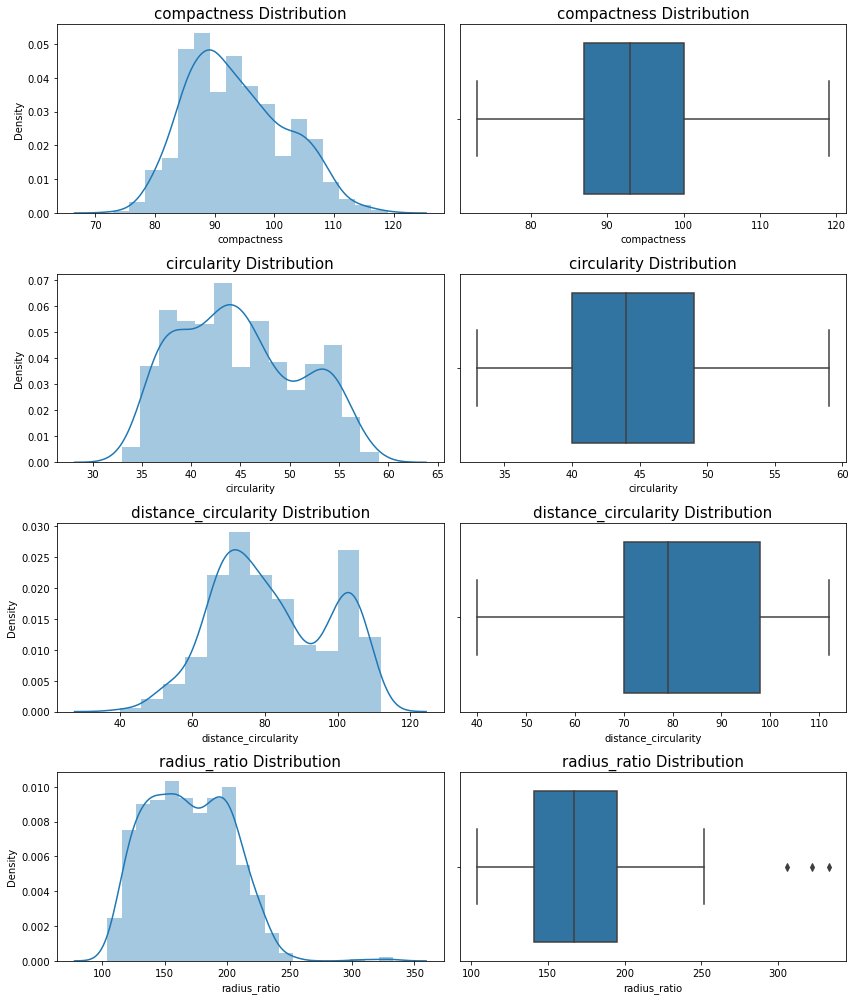

In [12]:
## Univariate except class column
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(12, 14)
a = sns.distplot(data_df['compactness'] , ax=axes[0][0])
a.set_title("compactness Distribution",fontsize=15)
a = sns.boxplot(data_df['compactness'] , orient = "v" , ax=axes[0][1])
a.set_title("compactness Distribution",fontsize=15)

a = sns.distplot(data_df['circularity'] , ax=axes[1][0])
a.set_title("circularity Distribution",fontsize=15)

a = sns.boxplot(data_df['circularity'] , orient = "v" , ax=axes[1][1])
a.set_title("circularity Distribution",fontsize=15)

a = sns.distplot(data_df['distance_circularity'] , ax=axes[2][0])
a.set_title("distance_circularity Distribution",fontsize=15)

a = sns.boxplot(data_df['distance_circularity'] , orient = "v" , ax=axes[2][1])
a.set_title("distance_circularity Distribution",fontsize=15)


a = sns.distplot(data_df['radius_ratio'] , ax=axes[3][0])
a.set_title("radius_ratio Distribution",fontsize=15)

a = sns.boxplot(data_df['radius_ratio'] , orient = "v" , ax=axes[3][1])
a.set_title("radius_ratio Distribution",fontsize=15)

plt.tight_layout()
plt.show()

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will

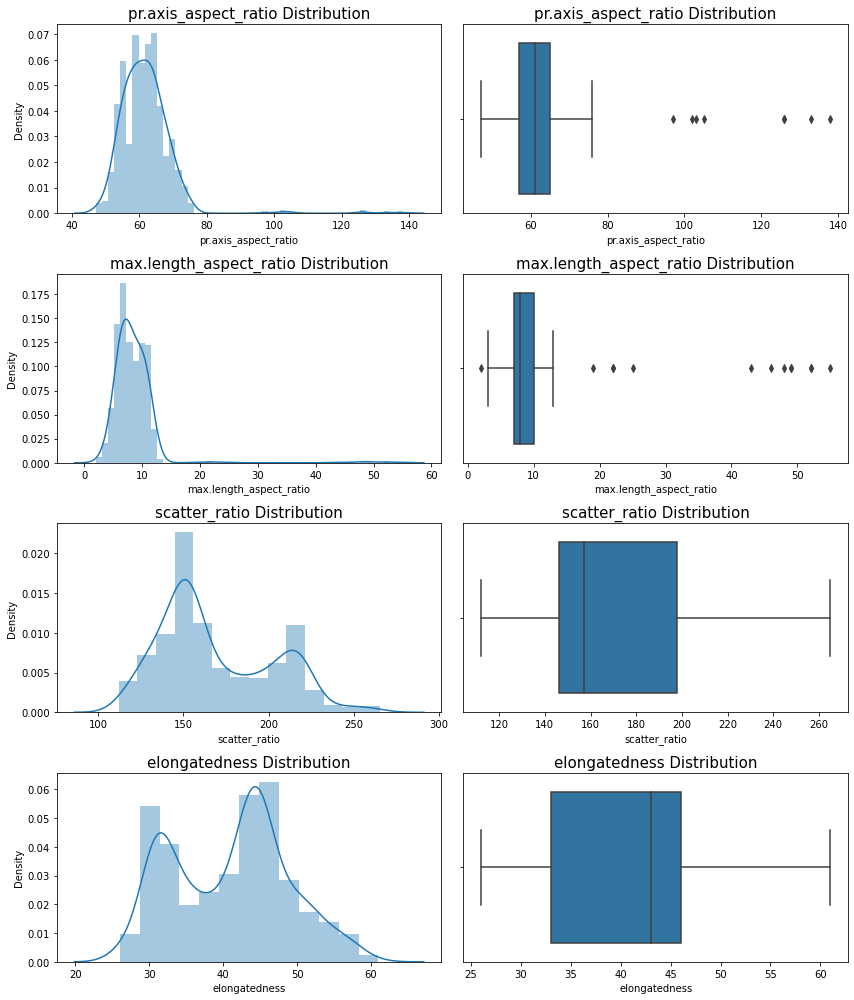

In [13]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(12, 14)
a = sns.distplot(data_df['pr.axis_aspect_ratio'] , ax=axes[0][0])
a.set_title("pr.axis_aspect_ratio Distribution",fontsize=15)
a = sns.boxplot(data_df['pr.axis_aspect_ratio'] , orient = "v" , ax=axes[0][1])
a.set_title("pr.axis_aspect_ratio Distribution",fontsize=15)

a = sns.distplot(data_df['max.length_aspect_ratio'] , ax=axes[1][0])
a.set_title("max.length_aspect_ratio Distribution",fontsize=15)

a = sns.boxplot(data_df['max.length_aspect_ratio'] , orient = "v" , ax=axes[1][1])
a.set_title("max.length_aspect_ratio Distribution",fontsize=15)

a = sns.distplot(data_df['scatter_ratio'] , ax=axes[2][0])
a.set_title("scatter_ratio Distribution",fontsize=15)

a = sns.boxplot(data_df['scatter_ratio'] , orient = "v" , ax=axes[2][1])
a.set_title("scatter_ratio Distribution",fontsize=15)


a = sns.distplot(data_df['elongatedness'] , ax=axes[3][0])
a.set_title("elongatedness Distribution",fontsize=15)

a = sns.boxplot(data_df['elongatedness'] , orient = "v" , ax=axes[3][1])
a.set_title("elongatedness Distribution",fontsize=15)

plt.tight_layout()
plt.show()

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will

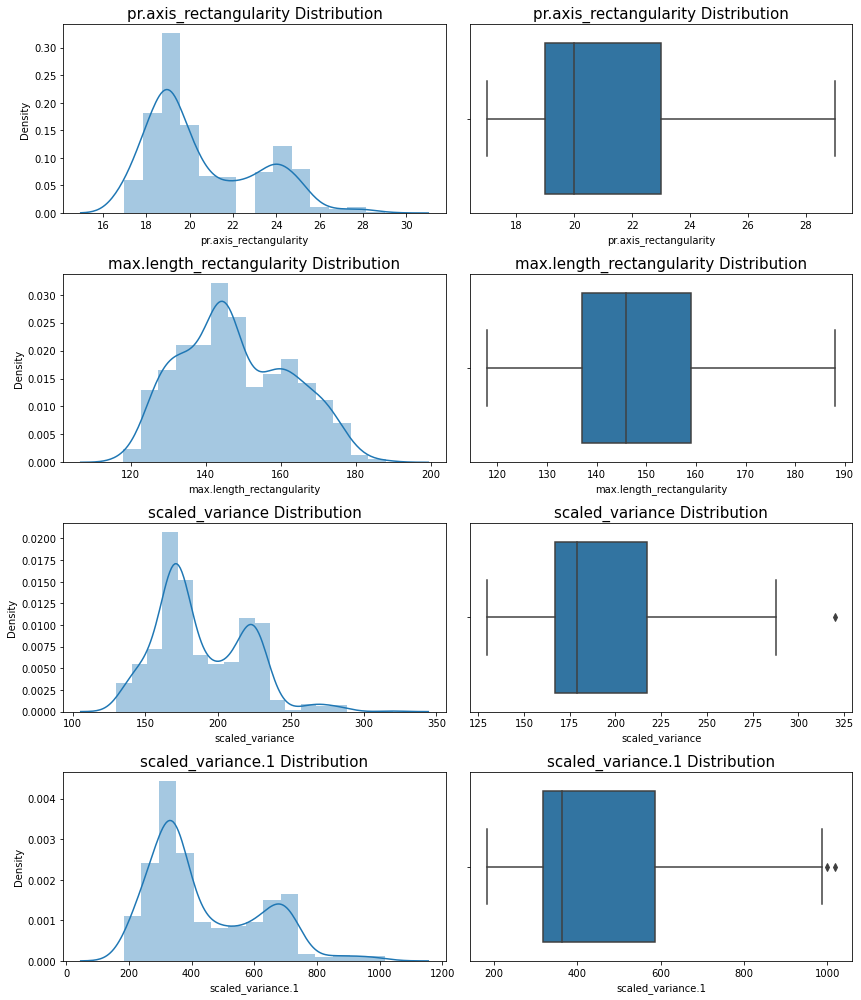

In [14]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(12, 14)
a = sns.distplot(data_df['pr.axis_rectangularity'] , ax=axes[0][0])
a.set_title("pr.axis_rectangularity Distribution",fontsize=15)
a = sns.boxplot(data_df['pr.axis_rectangularity'] , orient = "v" , ax=axes[0][1])
a.set_title("pr.axis_rectangularity Distribution",fontsize=15)

a = sns.distplot(data_df['max.length_rectangularity'] , ax=axes[1][0])
a.set_title("max.length_rectangularity Distribution",fontsize=15)

a = sns.boxplot(data_df['max.length_rectangularity'] , orient = "v" , ax=axes[1][1])
a.set_title("max.length_rectangularity Distribution",fontsize=15)

a = sns.distplot(data_df['scaled_variance'] , ax=axes[2][0])
a.set_title("scaled_variance Distribution",fontsize=15)

a = sns.boxplot(data_df['scaled_variance'] , orient = "v" , ax=axes[2][1])
a.set_title("scaled_variance Distribution",fontsize=15)


a = sns.distplot(data_df['scaled_variance.1'] , ax=axes[3][0])
a.set_title("scaled_variance.1 Distribution",fontsize=15)

a = sns.boxplot(data_df['scaled_variance.1'] , orient = "v" , ax=axes[3][1])
a.set_title("scaled_variance.1 Distribution",fontsize=15)

plt.tight_layout()
plt.show()

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will

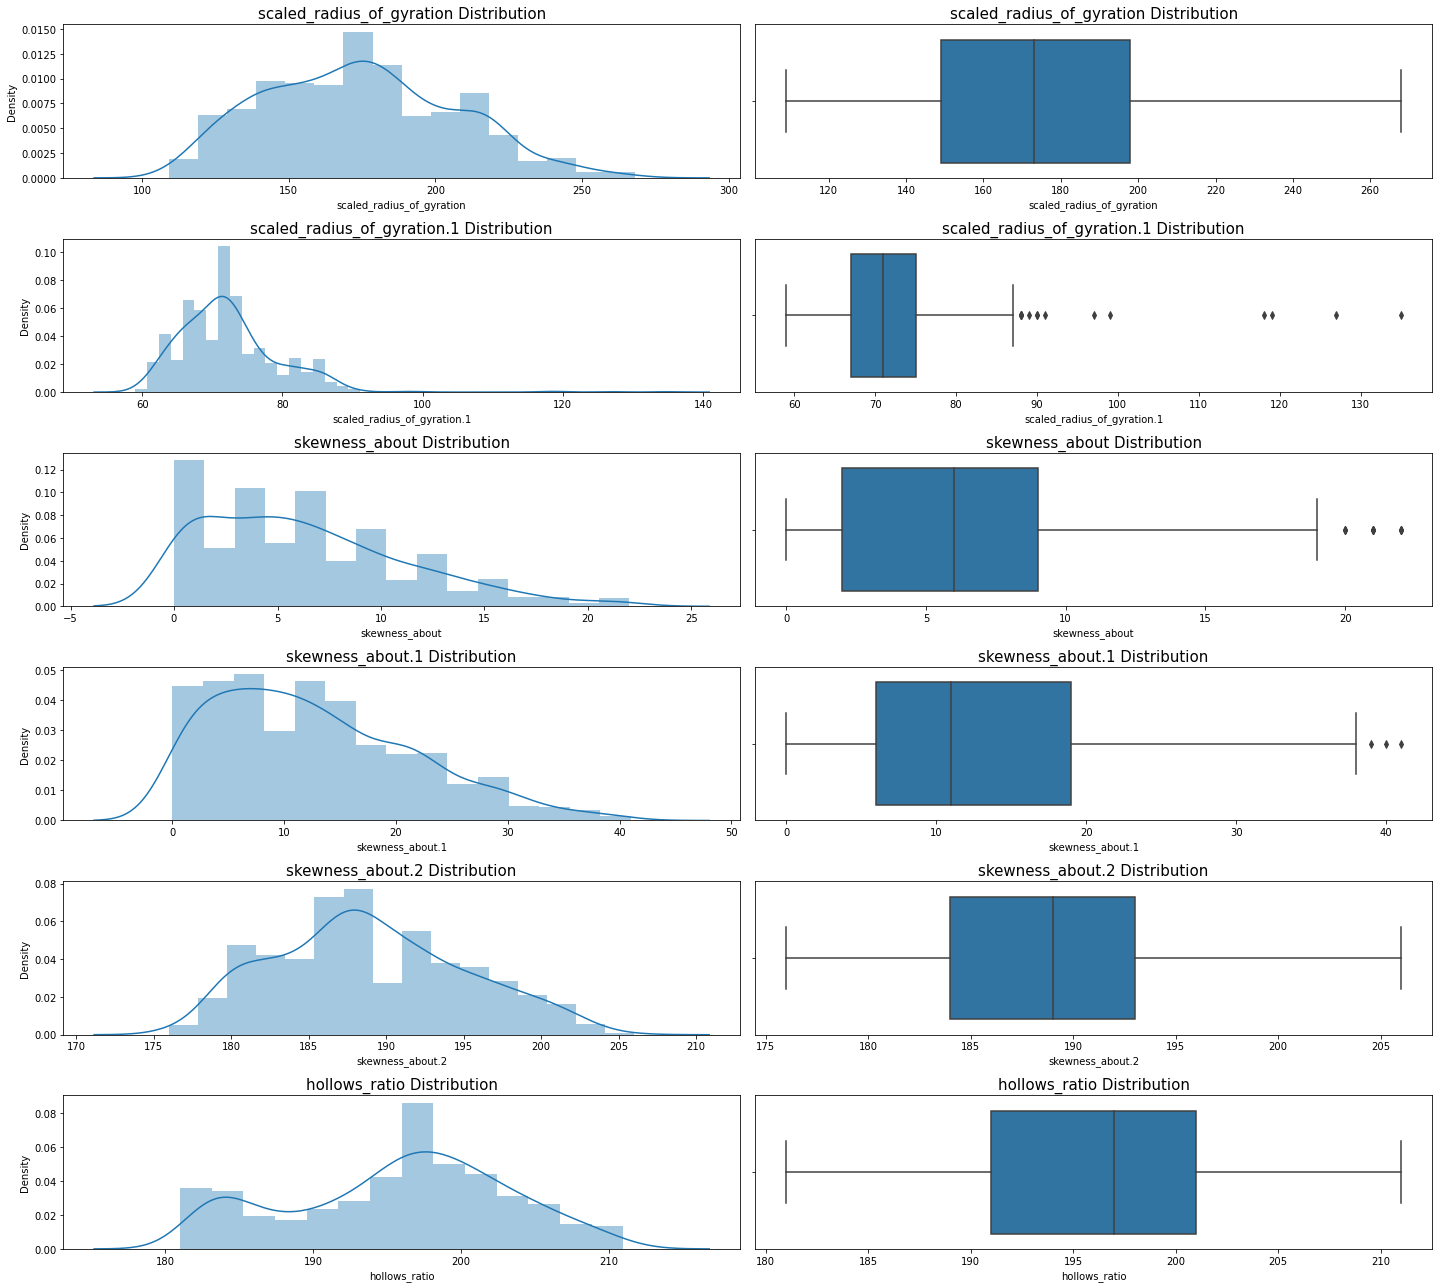

In [15]:
fig, axes = plt.subplots(nrows=6,ncols=2)
fig.set_size_inches(20, 18)
a = sns.distplot(data_df['scaled_radius_of_gyration'] , ax=axes[0][0])
a.set_title("scaled_radius_of_gyration Distribution",fontsize=15)
a = sns.boxplot(data_df['scaled_radius_of_gyration'] , orient = "v" , ax=axes[0][1])
a.set_title("scaled_radius_of_gyration Distribution",fontsize=15)

a = sns.distplot(data_df['scaled_radius_of_gyration.1'] , ax=axes[1][0])
a.set_title("scaled_radius_of_gyration.1 Distribution",fontsize=15)

a = sns.boxplot(data_df['scaled_radius_of_gyration.1'] , orient = "v" , ax=axes[1][1])
a.set_title("scaled_radius_of_gyration.1 Distribution",fontsize=15)

a = sns.distplot(data_df['skewness_about'] , ax=axes[2][0])
a.set_title("skewness_about Distribution",fontsize=15)

a = sns.boxplot(data_df['skewness_about'] , orient = "v" , ax=axes[2][1])
a.set_title("skewness_about Distribution",fontsize=15)


a = sns.distplot(data_df['skewness_about.1'] , ax=axes[3][0])
a.set_title("skewness_about.1 Distribution",fontsize=15)

a = sns.boxplot(data_df['skewness_about.1'] , orient = "v" , ax=axes[3][1])
a.set_title("skewness_about.1 Distribution",fontsize=15)


a = sns.distplot(data_df['skewness_about.2'] , ax=axes[4][0])
a.set_title("skewness_about.2 Distribution",fontsize=15)

a = sns.boxplot(data_df['skewness_about.2'] , orient = "v" , ax=axes[4][1])
a.set_title("skewness_about.2 Distribution",fontsize=15)

a = sns.distplot(data_df['hollows_ratio'] , ax=axes[5][0])
a.set_title("hollows_ratio Distribution",fontsize=15)

a = sns.boxplot(data_df['hollows_ratio'] , orient = "v" , ax=axes[5][1])
a.set_title("hollows_ratio Distribution",fontsize=15)

plt.tight_layout()
plt.show()

**We observe from the plots that the following variables have outliers - radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scaled_variance,scaled_variance.1,scaled_radius_of_gyration.1,skewness_about,skewness_about.1**


# Bi- Variate Analysis:

In [16]:
# Check for correlation of variable
data_df.corr(method='pearson')

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
compactness,1.000000,0.689885,0.789955,0.688130,0.090557,0.150369,0.814026,-0.788051,0.814227,0.674902,0.764386,0.820240,0.581405,-0.258437,0.231648,0.168384,0.296195,0.372806
circularity,0.689885,1.000000,0.797704,0.623950,0.155023,0.251619,0.858149,-0.825108,0.856137,0.965366,0.806108,0.850932,0.935594,0.049070,0.141726,-0.001975,-0.113902,0.049331
distance_circularity,0.789955,0.797704,1.000000,0.771404,0.163386,0.265591,0.909023,-0.912713,0.897261,0.773459,0.865683,0.891789,0.705689,-0.238145,0.110280,0.277851,0.145258,0.343228
radius_ratio,0.688130,0.623950,0.771404,1.000000,0.667375,0.452460,0.743470,-0.795761,0.716210,0.570478,0.806788,0.731773,0.544636,-0.175348,0.044693,0.178079,0.375591,0.470895
pr.axis_aspect_ratio,0.090557,0.155023,0.163386,0.667375,1.000000,0.652093,0.113696,-0.191193,0.086992,0.133553,0.290375,0.100668,0.135663,0.173060,-0.059244,-0.040769,0.229702,0.257566
max.length_aspect_ratio,0.150369,0.251619,0.265591,0.452460,0.652093,1.000000,0.171445,-0.183242,0.167514,0.309180,0.331124,0.150069,0.197179,0.308329,0.016461,0.041210,-0.030543,0.139283
scatter_ratio,0.814026,0.858149,0.909023,0.743470,0.113696,0.171445,1.000000,-0.973413,0.991992,0.808154,0.950067,0.996396,0.795748,-0.045632,0.070118,0.227375,0.009967,0.138424
elongatedness,-0.788051,-0.825108,-0.912713,-0.795761,-0.191193,-0.183242,-0.973413,1.000000,-0.950345,-0.771099,-0.937846,-0.956858,-0.761563,0.119750,-0.046621,-0.201325,-0.117568,-0.233408
pr.axis_rectangularity,0.814227,0.856137,0.897261,0.716210,0.086992,0.167514,0.991992,-0.950345,1.000000,0.811979,0.935653,0.992119,0.792895,-0.033769,0.078701,0.231171,-0.017383,0.117202
max.length_rectangularity,0.674902,0.965366,0.773459,0.570478,0.133553,0.309180,0.808154,-0.771099,0.811979,1.000000,0.744760,0.796230,0.865240,0.031098,0.130356,0.013045,-0.108019,0.086792


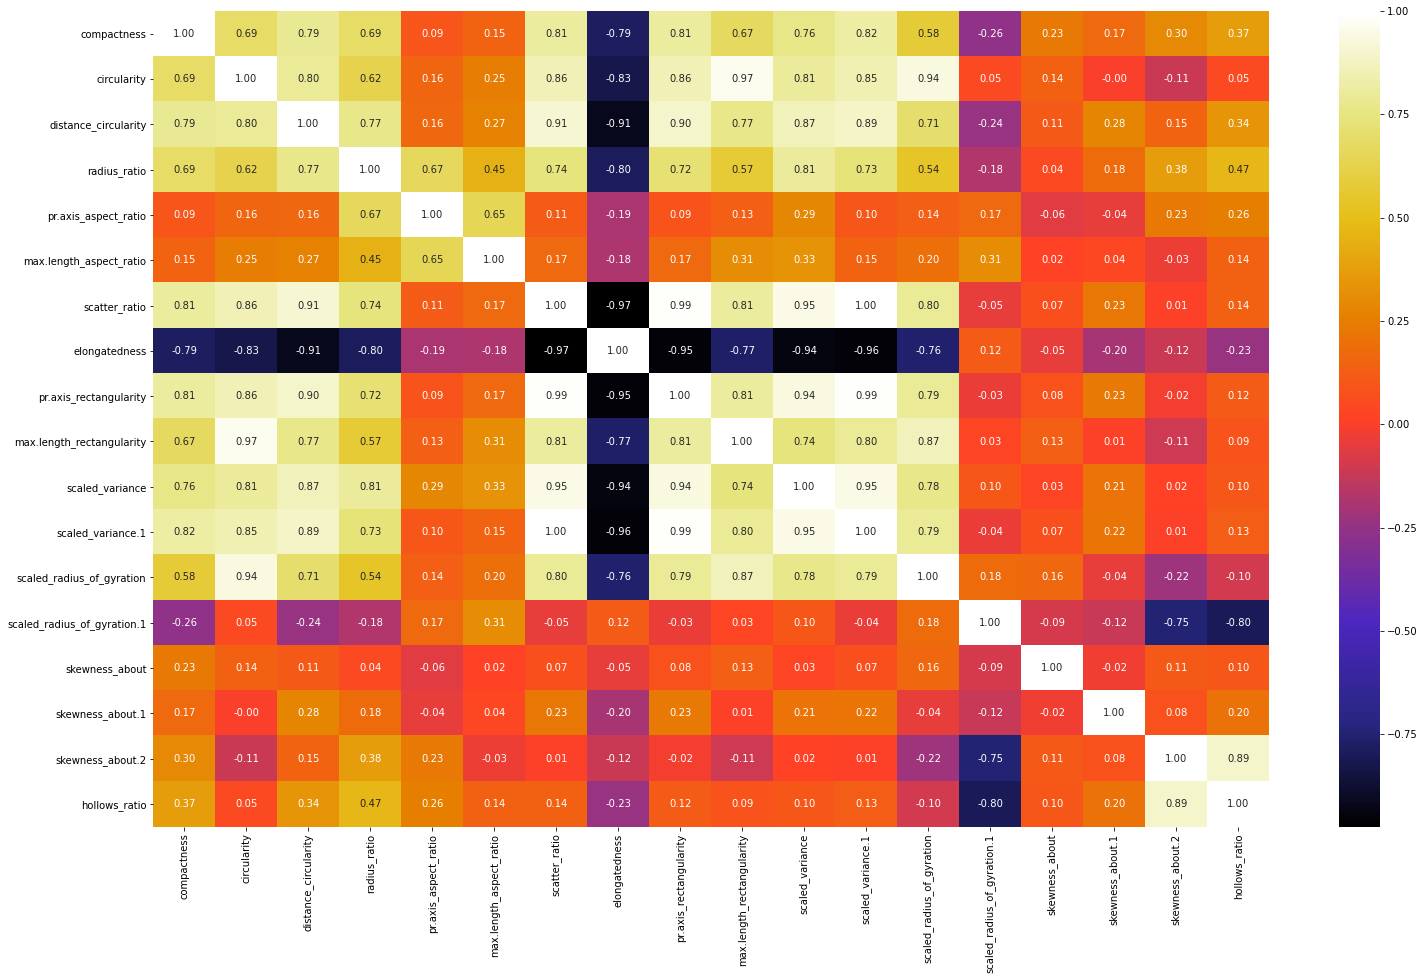

In [17]:
# plot the correlation coefficients as a heatmap
plt.subplots(figsize=(25,15))
sns.heatmap(data_df.corr(), annot=True,fmt='.2f',cmap='CMRmap')
plt.show()

<AxesSubplot:>

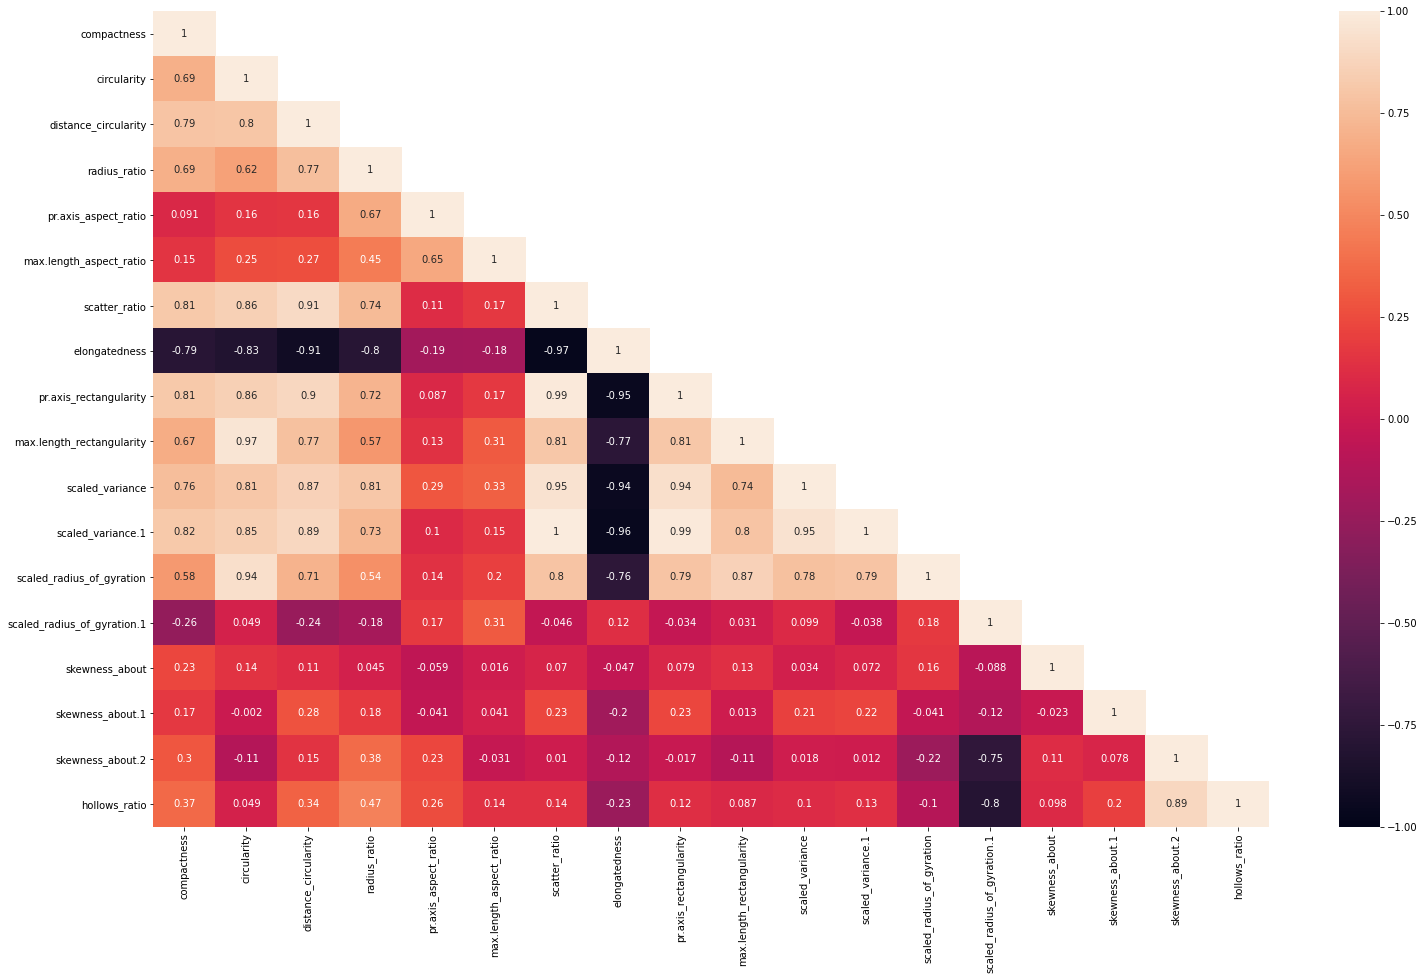

In [18]:
cor = data_df.corr()
mask = np.array(cor)
mask[np.tril_indices_from(mask)] = False
plt.subplots(figsize=(25,15))
sns.heatmap(cor, mask = mask, annot = True, vmin = -1, vmax = 1)

**We can see that many columns are co-related to each other or in other words the correlation exists for many columns and the highest is between max-length_rectangularity and circularity**


### Point to be noted :  Class would be the target variable. Should be removed when PCA is done

In [19]:
#Let us check for pair plots
#sns.pairplot(data_df,diag_kind='kde')
#plt.show()

# Outlier Check & Treatment

## Outlier Check using Boxplot

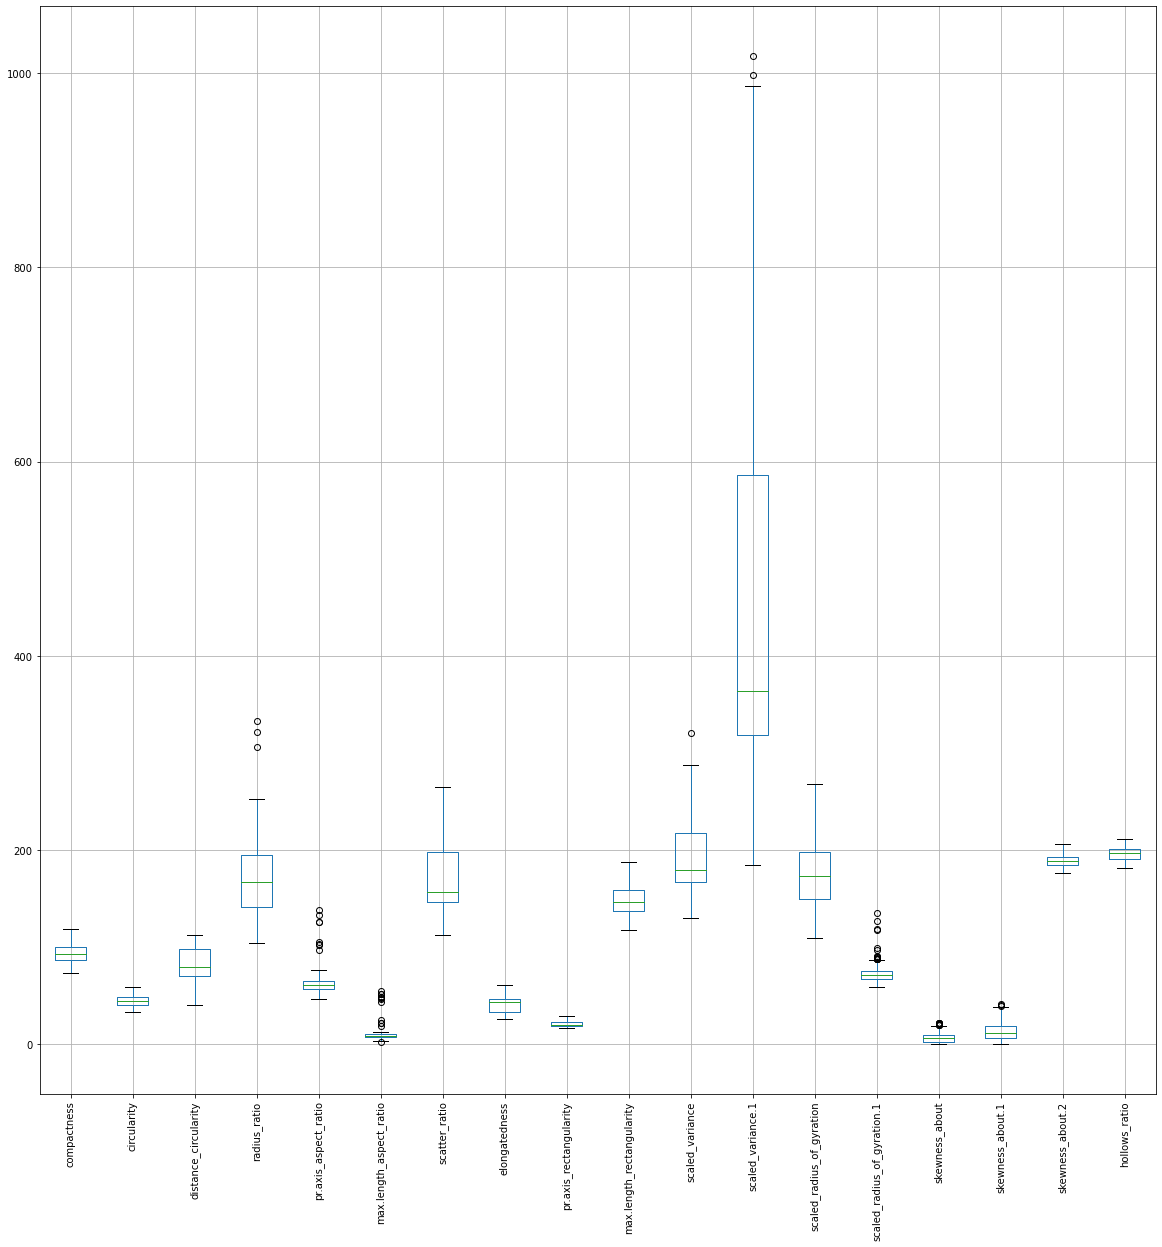

In [20]:
data_df.boxplot(figsize=(20,20))
plt.xticks(rotation=90)
plt.show()

**we observe that the same columns have outliers, let us try to handle them by using custom function**

## Outlier treatment :  define a custom function- If for a particular column the max value is greater than that assign max value,same logic for min value

In [21]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [22]:
lratio,uratio=remove_outlier(data_df['radius_ratio'])
data_df['radius_ratio']=np.where(data_df['radius_ratio']>uratio,uratio,data_df['radius_ratio'])
data_df['radius_ratio']=np.where(data_df['radius_ratio']<lratio,lratio,data_df['radius_ratio'])

lraxis,uraxis=remove_outlier(data_df['pr.axis_aspect_ratio'])
data_df['pr.axis_aspect_ratio']=np.where(data_df['pr.axis_aspect_ratio']>uraxis,uraxis,data_df['pr.axis_aspect_ratio'])
data_df['pr.axis_aspect_ratio']=np.where(data_df['pr.axis_aspect_ratio']<lraxis,lraxis,data_df['pr.axis_aspect_ratio'])

lraspect,uraspect=remove_outlier(data_df['max.length_aspect_ratio'])
data_df['max.length_aspect_ratio']=np.where(data_df['max.length_aspect_ratio']>uraspect,uraspect,data_df['max.length_aspect_ratio'])
data_df['max.length_aspect_ratio']=np.where(data_df['max.length_aspect_ratio']<lraspect,lraspect,data_df['max.length_aspect_ratio'])

lrscaled_var,urscaled_var=remove_outlier(data_df['scaled_variance'])
data_df['scaled_variance']=np.where(data_df['scaled_variance']>urscaled_var,urscaled_var,data_df['scaled_variance'])
data_df['scaled_variance']=np.where(data_df['scaled_variance']<lrscaled_var,lrscaled_var,data_df['scaled_variance'])

lrscal_Var1,urscal_Var1=remove_outlier(data_df['scaled_variance.1'])
data_df['scaled_variance.1']=np.where(data_df['scaled_variance.1']>urscal_Var1,urscal_Var1,data_df['scaled_variance.1'])
data_df['scaled_variance.1']=np.where(data_df['scaled_variance.1']<lrscal_Var1,lrscal_Var1,data_df['scaled_variance.1'])

lradius_gyration,uradius_gyration=remove_outlier(data_df['scaled_radius_of_gyration.1'])
data_df['scaled_radius_of_gyration.1']=np.where(data_df['scaled_radius_of_gyration.1']>uradius_gyration,uradius_gyration,data_df['scaled_radius_of_gyration.1'])
data_df['scaled_radius_of_gyration.1']=np.where(data_df['scaled_radius_of_gyration.1']<lradius_gyration,lradius_gyration,data_df['scaled_radius_of_gyration.1'])


lSkew,uSkew=remove_outlier(data_df['skewness_about'])
data_df['skewness_about']=np.where(data_df['skewness_about']>uSkew,uSkew,data_df['skewness_about'])
data_df['skewness_about']=np.where(data_df['skewness_about']<lSkew,lSkew,data_df['skewness_about'])

lSkew1,uSkew1=remove_outlier(data_df['skewness_about.1'])
data_df['skewness_about.1']=np.where(data_df['skewness_about.1']>uSkew1,uSkew1,data_df['skewness_about.1'])
data_df['skewness_about.1']=np.where(data_df['skewness_about.1']<lSkew1,lSkew1,data_df['skewness_about.1'])

## Plotting Boxplot after outlier treatment

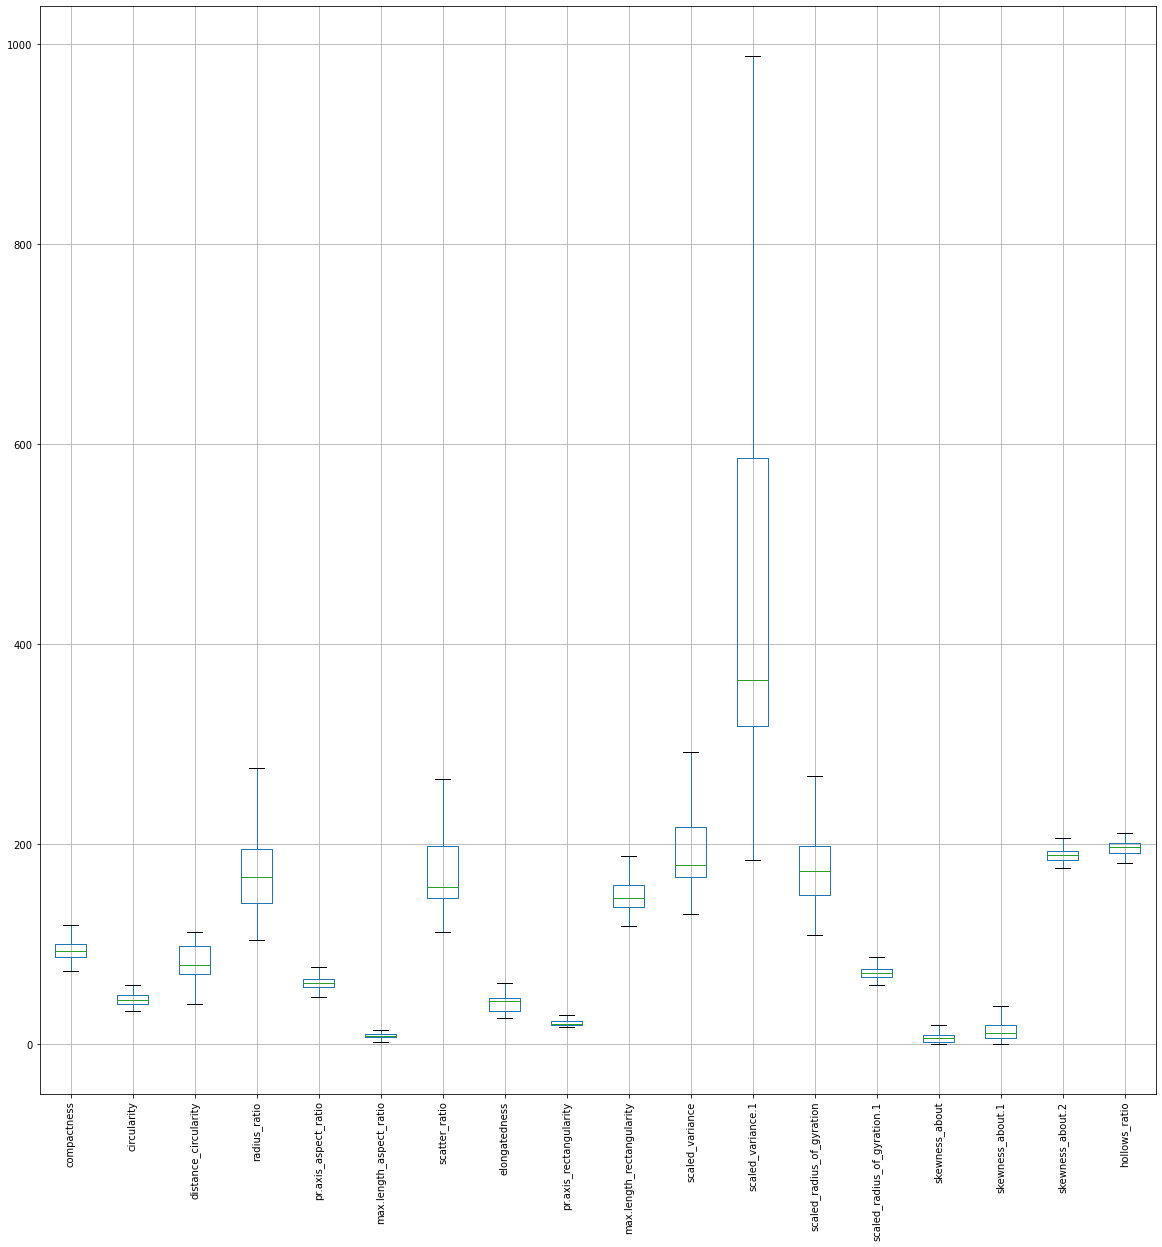

In [23]:
data_df.boxplot(figsize=(20,20))
plt.xticks(rotation=90)
plt.show()

# PCA

**PCA is a statistical technique and uses orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables. PCA also is a tool to reduce multidimensional data to lower dimensions while retaining most of the information. Principal Component Analysis (PCA) is a well-established mathematical technique for reducing the dimensionality of data, while keeping as much variation as possible.**

**This PCA can only be done on continuous variables**

## Drop Class column

In [24]:
# Since Names column has unique values , so will remove it from the dataset.More over there is no point in adding ID for PCA.
data_df=data_df.drop(["class"],axis=1)

In [25]:
data_df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,95,48.0,83.0,178.0,72.0,10.0,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197
1,91,41.0,84.0,141.0,57.0,9.0,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199
2,104,50.0,106.0,209.0,66.0,10.0,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196
3,93,41.0,82.0,159.0,63.0,9.0,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207
4,85,44.0,70.0,205.0,77.0,14.5,149.0,45.0,19.0,144,241.0,325.0,188.0,87.0,9.0,11.0,180.0,183


## Standardizing before processing PCA

In [26]:
# All variables must be on same scale, hence we can omit scaling.
# Standardization
from scipy.stats import zscore
data_new=data_df.apply(zscore)
data_new.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.163231,0.520408,0.060669,0.275095,1.814935,0.801865,-0.198517,0.129648,-0.217151,0.766312,-0.397957,-0.339039,0.301676,-0.336861,-0.067703,0.372602,-0.321809,0.171837
1,-0.322874,-0.619123,0.124067,-0.847718,-0.750630,0.351180,-0.591720,0.514333,-0.606014,-0.337462,-0.591403,-0.619031,-0.502972,-0.025824,0.550749,0.148005,0.003400,0.442318
2,1.256966,0.845988,1.518823,1.215831,0.788709,0.801865,1.162569,-1.152637,0.949438,0.697326,1.117373,1.123780,1.415804,0.129694,1.581501,-0.413488,-0.159204,0.036596
3,-0.079822,-0.619123,-0.002729,-0.301485,0.275596,0.351180,-0.742952,0.642562,-0.606014,-0.337462,-0.913814,-0.739028,-1.462359,-1.425488,-0.067703,-0.301190,1.629444,1.524243
4,-1.052030,-0.130753,-0.763506,1.094445,2.670123,2.829947,-0.591720,0.514333,-0.606014,-0.268476,1.697712,-0.647602,0.425468,2.306950,0.550749,-0.188891,-1.460039,-1.721531


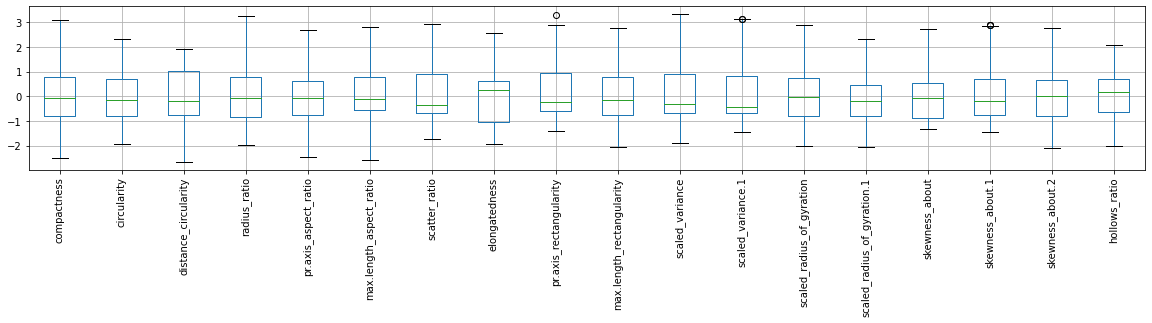

In [27]:
data_new.boxplot(figsize=(20,3))
plt.xticks(rotation=90)
plt.show()

## Create a covariance matrix for identifying Principal components

In [28]:
# PCA
# Step 1 - Create covariance matrix
cov_matrix = np.cov(data_new.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00123153  0.69073497  0.79092746  0.70377796  0.16788275  0.44946469
   0.81502868 -0.78902127  0.81522961  0.67573322  0.7684976   0.82140686
   0.58212123 -0.2752691   0.22944245  0.16862872  0.29656022  0.3732647 ]
 [ 0.69073497  1.00123153  0.79868656  0.63492543  0.20053277  0.52972719
   0.85920548 -0.8261242   0.85719089  0.96655501  0.81009539  0.85214389
   0.93674669  0.05333274  0.14221546 -0.00160688 -0.1140426   0.04939203]
 [ 0.79092746  0.79868656  1.00123153  0.78661123  0.2370389   0.62072353
   0.91014241 -0.9138366   0.89836576  0.77441118  0.87018356  0.89327918
   0.70655787 -0.26354646  0.10975518  0.27833298  0.14543699  0.34365085]
 [ 0.70377796  0.63492543  0.78661123  1.00123153  0.68697896  0.50201311
   0.76083438 -0.81368373  0.73340135  0.57884146  0.80904795  0.7498534
   0.55409982 -0.32850547  0.04513501  0.18220311  0.3858339   0.48124398]
 [ 0.16788275  0.20053277  0.2370389   0.68697896  1.00123153  0.22780935
   0.1884992 

In [29]:
#Even if we take the transpose of the covariance matrix it results in same value as that of the above
cov_matrix = np.cov(data_new.T).T
print('Covariance Matrix \n', cov_matrix)

Covariance Matrix 
 [[ 1.00123153  0.69073497  0.79092746  0.70377796  0.16788275  0.44946469
   0.81502868 -0.78902127  0.81522961  0.67573322  0.7684976   0.82140686
   0.58212123 -0.2752691   0.22944245  0.16862872  0.29656022  0.3732647 ]
 [ 0.69073497  1.00123153  0.79868656  0.63492543  0.20053277  0.52972719
   0.85920548 -0.8261242   0.85719089  0.96655501  0.81009539  0.85214389
   0.93674669  0.05333274  0.14221546 -0.00160688 -0.1140426   0.04939203]
 [ 0.79092746  0.79868656  1.00123153  0.78661123  0.2370389   0.62072353
   0.91014241 -0.9138366   0.89836576  0.77441118  0.87018356  0.89327918
   0.70655787 -0.26354646  0.10975518  0.27833298  0.14543699  0.34365085]
 [ 0.70377796  0.63492543  0.78661123  1.00123153  0.68697896  0.50201311
   0.76083438 -0.81368373  0.73340135  0.57884146  0.80904795  0.7498534
   0.55409982 -0.32850547  0.04513501  0.18220311  0.3858339   0.48124398]
 [ 0.16788275  0.20053277  0.2370389   0.68697896  1.00123153  0.22780935
   0.1884992  -

## Comparing Correlation and Covariance Matrix


In [30]:
# Now without Scaling lets check out correlation matrix
df_corr = data_df.copy()
df_corr.corr()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
compactness,1.000000,0.689885,0.789955,0.702912,0.167676,0.448912,0.814026,-0.788051,0.814227,0.674902,0.767552,0.820397,0.581405,-0.274931,0.229160,0.168421,0.296195,0.372806
circularity,0.689885,1.000000,0.797704,0.634144,0.200286,0.529076,0.858149,-0.825108,0.856137,0.965366,0.809099,0.851096,0.935594,0.053267,0.142041,-0.001605,-0.113902,0.049331
distance_circularity,0.789955,0.797704,1.000000,0.785644,0.236747,0.619960,0.909023,-0.912713,0.897261,0.773459,0.869113,0.892180,0.705689,-0.263222,0.109620,0.277991,0.145258,0.343228
radius_ratio,0.702912,0.634144,0.785644,1.000000,0.686134,0.501396,0.759899,-0.812683,0.732499,0.578129,0.808053,0.748931,0.553418,-0.328101,0.045079,0.181979,0.385359,0.480652
pr.axis_aspect_ratio,0.167676,0.200286,0.236747,0.686134,1.000000,0.227529,0.188267,-0.288500,0.154253,0.158370,0.259671,0.174951,0.166516,-0.231624,-0.058149,-0.038356,0.358833,0.379987
max.length_aspect_ratio,0.448912,0.529076,0.619960,0.501396,0.227529,1.000000,0.456077,-0.468937,0.453606,0.619712,0.436693,0.419539,0.390697,-0.253962,0.088058,0.128494,0.050907,0.370434
scatter_ratio,0.814026,0.858149,0.909023,0.759899,0.188267,0.456077,1.000000,-0.973413,0.991992,0.808154,0.954516,0.996483,0.795748,-0.033193,0.069513,0.227595,0.009967,0.138424
elongatedness,-0.788051,-0.825108,-0.912713,-0.812683,-0.288500,-0.468937,-0.973413,1.000000,-0.950345,-0.771099,-0.942073,-0.957181,-0.761563,0.121895,-0.046400,-0.201445,-0.117568,-0.233408
pr.axis_rectangularity,0.814227,0.856137,0.897261,0.732499,0.154253,0.453606,0.991992,-0.950345,1.000000,0.811979,0.940258,0.992119,0.792895,-0.016989,0.077985,0.231361,-0.017383,0.117202
max.length_rectangularity,0.674902,0.965366,0.773459,0.578129,0.158370,0.619712,0.808154,-0.771099,0.811979,1.000000,0.747346,0.796457,0.865240,0.031877,0.130685,0.013441,-0.108019,0.086792


In [31]:
#With standardisation (Without standardisation also, correlation matrix yields same result)
data_new.corr()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
compactness,1.000000,0.689885,0.789955,0.702912,0.167676,0.448912,0.814026,-0.788051,0.814227,0.674902,0.767552,0.820397,0.581405,-0.274931,0.229160,0.168421,0.296195,0.372806
circularity,0.689885,1.000000,0.797704,0.634144,0.200286,0.529076,0.858149,-0.825108,0.856137,0.965366,0.809099,0.851096,0.935594,0.053267,0.142041,-0.001605,-0.113902,0.049331
distance_circularity,0.789955,0.797704,1.000000,0.785644,0.236747,0.619960,0.909023,-0.912713,0.897261,0.773459,0.869113,0.892180,0.705689,-0.263222,0.109620,0.277991,0.145258,0.343228
radius_ratio,0.702912,0.634144,0.785644,1.000000,0.686134,0.501396,0.759899,-0.812683,0.732499,0.578129,0.808053,0.748931,0.553418,-0.328101,0.045079,0.181979,0.385359,0.480652
pr.axis_aspect_ratio,0.167676,0.200286,0.236747,0.686134,1.000000,0.227529,0.188267,-0.288500,0.154253,0.158370,0.259671,0.174951,0.166516,-0.231624,-0.058149,-0.038356,0.358833,0.379987
max.length_aspect_ratio,0.448912,0.529076,0.619960,0.501396,0.227529,1.000000,0.456077,-0.468937,0.453606,0.619712,0.436693,0.419539,0.390697,-0.253962,0.088058,0.128494,0.050907,0.370434
scatter_ratio,0.814026,0.858149,0.909023,0.759899,0.188267,0.456077,1.000000,-0.973413,0.991992,0.808154,0.954516,0.996483,0.795748,-0.033193,0.069513,0.227595,0.009967,0.138424
elongatedness,-0.788051,-0.825108,-0.912713,-0.812683,-0.288500,-0.468937,-0.973413,1.000000,-0.950345,-0.771099,-0.942073,-0.957181,-0.761563,0.121895,-0.046400,-0.201445,-0.117568,-0.233408
pr.axis_rectangularity,0.814227,0.856137,0.897261,0.732499,0.154253,0.453606,0.991992,-0.950345,1.000000,0.811979,0.940258,0.992119,0.792895,-0.016989,0.077985,0.231361,-0.017383,0.117202
max.length_rectangularity,0.674902,0.965366,0.773459,0.578129,0.158370,0.619712,0.808154,-0.771099,0.811979,1.000000,0.747346,0.796457,0.865240,0.031877,0.130685,0.013441,-0.108019,0.086792


 **`Covariance` indicates the direction of the linear relationship between variables. `Correlation` on the other hand measures both the strength and direction of the linear relationship between two variables.Correlation is a function of the covariance. 
 You can obtain the correlation coefficient of two variables by dividing the covariance of these variables by the product of the standard deviations of the same values.**

**We can  state that above three approaches yield the same eigenvectors and eigenvalue pairs:**

- **Eigen decomposition of the covariance matrix after standardizing the data.**

- **Eigen decomposition of the correlation matrix.**

- **Eigen decomposition of the correlation matrix after standardizing the data.**

**Finally we can say that after scaling - the covariance and the correlation have the same values**

## Identify eigenvalues and eigenvectors

In [32]:
# Step 2- Get eigen values and eigen vector
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('\n Eigen Values \n %s', eig_vals)
print('\n')
print('Eigen Vectors \n %s', eig_vecs)


 Eigen Values 
 %s [9.75592419e+00 3.26593719e+00 1.20041435e+00 1.17739558e+00
 8.54137636e-01 7.49103421e-01 3.46961731e-01 2.22403000e-01
 1.32208401e-01 9.75160321e-02 6.02445504e-02 5.48653930e-02
 3.99381171e-02 2.67746874e-02 3.63296016e-04 1.87215832e-02
 6.35471760e-03 1.29036168e-02]


Eigen Vectors 
 %s [[-2.71463705e-01  9.10920177e-02  1.13518788e-01  1.61459674e-01
  -1.59995907e-01  1.38473081e-01 -3.20481648e-01 -7.16051661e-01
  -3.36586613e-01  2.59534014e-01  5.77831369e-03 -1.34005379e-01
   8.41473196e-02  9.55628377e-02 -7.71438096e-04  6.07949883e-02
  -1.52390693e-02  7.80012945e-03]
 [-2.88738771e-01 -1.39761567e-01 -1.61271260e-01  1.24375623e-01
   1.00215010e-01  5.52181597e-02  3.80211692e-01 -1.06050098e-01
  -4.31365271e-02 -6.16097896e-02  5.75556319e-02  1.84778855e-01
   1.29799205e-02  1.28093099e-01 -1.44735353e-02 -1.53027967e-01
  -1.87292075e-01  7.53873450e-01]
 [-3.02090034e-01  4.95406279e-02  1.12460068e-01  1.14996857e-02
   1.05962555e-01  

**We see that there are totally 4 eigenvalues greater than 1**

## Cumulative Distribution of Eigenvalues

In [33]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 54.13291268  72.25469072  78.91545641  85.44849733  90.18786975
  94.3444365   96.26963075  97.5036832   98.23727088  98.77836025
  99.11264052  99.41707335  99.63867886  99.78724416  99.89112502
  99.96272361  99.99798417 100.        ]


In [34]:
eig_vals.size

18

## Scree plot

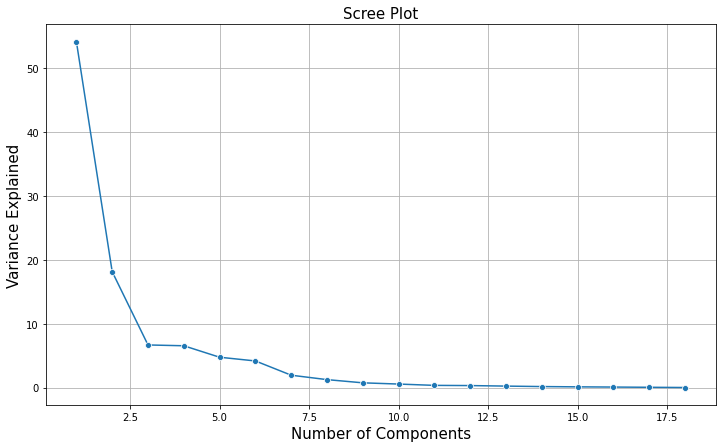

In [35]:
plt.figure(figsize=(12,7))
sns.lineplot(y=var_exp,x=range(1,len(var_exp)+1),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.grid()
plt.show()

- **Visually we can observe that their is steep drop in variance explained with increase in number of PC's.**
- **We will proceed with 4 components here. But depending on requirement 90% variation or 5 components will also do good**

## Plot Cumulative explained variance and individual explained variance vs Principal Components

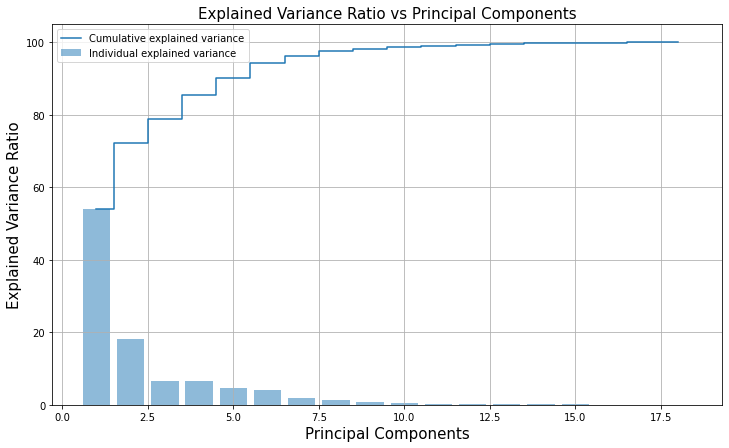

In [36]:
# Ploting 
plt.figure(figsize=(12 ,7))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio',fontsize=15)
plt.xlabel('Principal Components',fontsize=15)
plt.title('Explained Variance Ratio vs Principal Components',fontsize=15)
plt.legend(loc = 'best')
plt.grid()
plt.show()

## Use PCA  from sklearn's decomposition class and find Principal Components

In [37]:
# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot
from sklearn.decomposition import PCA

# NOTE - we are generating only 4 PCA dimensions (dimensionality reduction from 18 to 4)

pca = PCA(n_components=4)
data_reduced = pca.fit_transform(data_new)
data_reduced.transpose()

array([[ 0.55690765, -1.51767247,  3.88414779, ...,  5.06749158,
        -3.28174242, -4.93480055],
       [-0.54251542, -0.37416824,  0.26859609, ..., -0.05384067,
        -1.06945722,  0.39720101],
       [ 1.12911535, -0.58222089,  0.71220995, ...,  1.23052757,
        -1.56353947, -1.16660147],
       [-0.40344907,  0.92966018,  0.97803133, ..., -0.43621868,
        -1.16324241, -0.67250222]])

In [38]:
pca.components_

array([[ 0.27146371,  0.28873877,  0.30209003,  0.26875402,  0.09940084,
         0.18735446,  0.31059127, -0.30822674,  0.30743032,  0.27758356,
         0.30119684,  0.30768884,  0.26319643, -0.04692969,  0.03952566,
         0.06312533,  0.03673543,  0.08756744],
       [-0.09109202,  0.13976157, -0.04954063, -0.18722272, -0.23135175,
        -0.09181354,  0.07013779, -0.00798776,  0.08373525,  0.12409768,
         0.07162319,  0.07509761,  0.21124117,  0.50189383, -0.03976279,
        -0.09287341, -0.51343795, -0.51400308],
       [-0.11351879,  0.16127126, -0.11246007,  0.17510458,  0.53214408,
         0.09464219, -0.108663  ,  0.04643321, -0.12674288,  0.1423553 ,
        -0.05235788, -0.11532382,  0.1857444 ,  0.06294408,  0.00258174,
        -0.72116946,  0.01786564, -0.0213105 ],
       [ 0.16145967,  0.12437562,  0.01149969, -0.2284872 , -0.39091959,
         0.13716086, -0.05356889,  0.09567491, -0.03321075,  0.16446121,
        -0.13826734, -0.05070689,  0.11060084, -0.145

In [39]:
pca.explained_variance_ratio_

array([0.54132913, 0.18121778, 0.06660766, 0.06533041])

In [40]:
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
var #cumulative sum of variance explained with [n] features

array([54.1, 72.2, 78.9, 85.4])

**The Cumulative % gives the percentage of variance accounted for by the n components. For example, the cumulative percentage for the second component is the sum of the percentage of variance for the first and second components. It helps in deciding the number of components by selecting the components which explained the high variance.**

**In the above array we see that the first feature explains 54.1% of the variance within our data set while the first two explain 72.2 and so on. If we employ 4 features we capture ~ 85% of the variance within the dataset, thus we gain very little by implementing an additional feature (think of this as diminishing marginal return on total variance explained).**

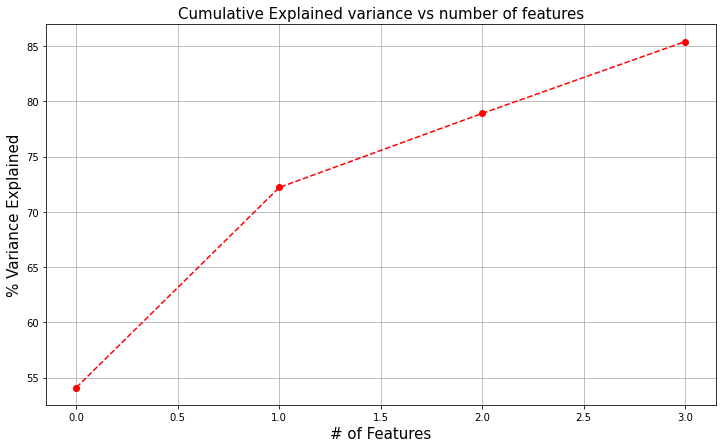

In [41]:
plt.figure(figsize=(12,7))
plt.plot(var, marker='o',linestyle='--',color='red')
plt.ylabel('% Variance Explained',fontsize=15)
plt.xlabel('# of Features',fontsize=15)
plt.title('Cumulative Explained variance vs number of features',fontsize=15)
plt.grid()
plt.show()

# Correlation between components and features

In [42]:
df_comp = pd.DataFrame(pca.components_,columns=list(data_new))
df_comp.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.271464,0.288739,0.302090,0.268754,0.099401,0.187354,0.310591,-0.308227,0.307430,0.277584,0.301197,0.307689,0.263196,-0.046930,0.039526,0.063125,0.036735,0.087567
1,-0.091092,0.139762,-0.049541,-0.187223,-0.231352,-0.091814,0.070138,-0.007988,0.083735,0.124098,0.071623,0.075098,0.211241,0.501894,-0.039763,-0.092873,-0.513438,-0.514003
2,-0.113519,0.161271,-0.112460,0.175105,0.532144,0.094642,-0.108663,0.046433,-0.126743,0.142355,-0.052358,-0.115324,0.185744,0.062944,0.002582,-0.721169,0.017866,-0.021310
3,0.161460,0.124376,0.011500,-0.228487,-0.390920,0.137161,-0.053569,0.095675,-0.033211,0.164461,-0.138267,-0.050707,0.110601,-0.145347,0.758285,-0.237025,0.051802,0.073551


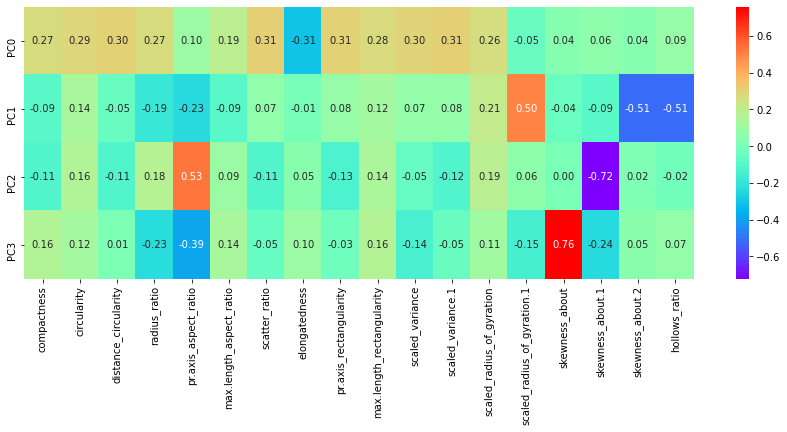

In [43]:
plt.figure(figsize=(15,5))
sns.heatmap(df_comp,cmap='rainbow',annot=True,fmt='.2f',yticklabels=['PC0','PC1','PC2','PC3'])
plt.show()

In [44]:
#pip install factor_analyzer

In [45]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value, p_value = calculate_bartlett_sphericity(data_df.corr())
chi_square_value, p_value

ModuleNotFoundError: No module named 'factor_analyzer'

**Inferences from the above Heatmap**
1. This heatmap and the color bar basically represent the correlation between the various feature and the principal component itself
2. Component 2 looks more related to aspect  - We can label it as aspect property
3. Depending on relations ship, we could go ahead and label relationship with features